In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def showOpencvImage(image, isGray=False):
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap = 'gray')
#    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    
def readBinaryData(n,SIZE,H,nbytes):

    if nbytes==2:
        d = np.zeros((SIZE,SIZE,H),np.uint16)
    elif nbytes==1:
        d = np.zeros((SIZE,SIZE,H),np.uint8)
    else:
        print('Wrong number of bytes per voxel')
        return
    
    f=open(n,"rb")
    for i in range(0,H):
        for j in range(0,SIZE):
            for k in range(0,SIZE):
                byte = f.read(nbytes)
                if nbytes==2:
                    a = 256*byte[0] + byte[1]
                else:
                    a = byte[0]
                d[j,k,i] = a
    f.close()
    return d   

def writeBinaryData(d,n):

    f=open(n,"wb")
    for i in range(0,d.shape[2]):
        for j in range(0,d.shape[0]):
            for k in range(0,d.shape[0]):
                byte = f.write(d[j,k,i])
    f.close()

def components3D(t):
    
    dum = np.zeros(t.shape,dtype=np.uint32)
    label = 0
    
    for x in range(0,t.shape[0]):
        for y in range(0,t.shape[1]):
            for z in range(0,t.shape[2]):
                if t[x,y,z] and dum[x,y,z]==0:
                    label = label+1
                    dum[x,y,z] = label
                    lista = []
                    lista.append((x,y,z))
                    while len(lista):
                        X,Y,Z = lista[0]
                        lista.pop(0)
                        for x1 in range(-1,2):
                            for y1 in range(-1,2):
                                for z1 in range(-1,2):
                                    if X+x1>=0 and X+x1<t.shape[0] and Y+y1>=0 and Y+y1<t.shape[1] and Z+z1>=0 and Z+z1<t.shape[2]:
                                        if t[X+x1,Y+y1,Z+z1] and dum[X+x1,Y+y1,Z+z1]==0:
                                            dum[X+x1,Y+y1,Z+z1] = label
                                            lista.append((X+x1,Y+y1,Z+z1))
    return label,dum

def maxComponent(t):

    n,dum = components3D(t)

    labMax = 0
    masaMax = 0

    for label in range(1,n+1):
        masa = np.sum(dum[dum==label])/label
        if masa>masaMax:
            masaMax = masa
            labMax = label
                        
    t[dum!=labMax] = 0
    return t   

In [4]:
# Step 4
# Korekcja predykcji z sieci neuronowej - wybieram regiony 3D skojarzone z kośćmi

PRED_DIR = './MyUnet/'

lab_dir_list = glob.glob(PRED_DIR+'PredBoneLabels_*.raw')
lab_dir_list.sort()

ITERATION_NUM = 3

for l in lab_dir_list:
    print(l)
    name_l = l.split('/')[-1].split('.')[0]
    _ , num_l,SIZE_l,_,H_l,B_l,_ = name_l.split('_')

    lab = readBinaryData(l,int(SIZE_l),int(H_l),int(B_l))
    dum = cv2.dilate(lab,None,iterations=ITERATION_NUM)
    dum = maxComponent(dum)

    lab[dum==0] = 0

    writeBinaryData(lab,PRED_DIR+'CorrBoneLabels_'+num_l + '_' + SIZE_l + '_' + SIZE_l + '_' + H_l + '_1_.raw')
    
lab_dir_list = glob.glob(PRED_DIR+'CorrBoneLabels_*.raw')
lab_dir_list.sort()

for l in lab_dir_list:
    print(l)
    name_l = l.split('/')[-1].split('.')[0]
    _ , num_l,SIZE_l,_,H_l,B_l,_ = name_l.split('_')

    lab = readBinaryData(l,int(SIZE_l),int(H_l),int(B_l))

    bkg = np.zeros(lab.shape,dtype = np.uint8)
    np.copyto(bkg,lab)
    bkg = 255 - bkg
    bkg = maxComponent(bkg)
                                
    lab[bkg==0] = 255      #3D hole filling
    writeBinaryData(lab,PRED_DIR+'Corr1BoneLabels_'+num_l + '_' + SIZE_l + '_' + SIZE_l + '_' + H_l + '_1_.raw')


./MyUnet/PredBoneLabels_12_560_560_18_1_.raw
./MyUnet/PredBoneLabels_13_560_560_18_1_.raw
./MyUnet/PredBoneLabels_14_560_560_18_1_.raw
./MyUnet/PredBoneLabels_15_560_560_18_1_.raw
./MyUnet/PredBoneLabels_16_800_800_22_1_.raw
./MyUnet/PredBoneLabels_17_560_560_18_1_.raw
./MyUnet/PredBoneLabels_18_560_560_18_1_.raw
./MyUnet/PredBoneLabels_19_560_560_20_1_.raw
./MyUnet/PredBoneLabels_20_560_560_18_1_.raw
./MyUnet/PredBoneLabels_21_560_560_18_1_.raw
./MyUnet/PredBoneLabels_22_560_560_22_1_.raw
./MyUnet/PredBoneLabels_23_560_560_20_1_.raw
./MyUnet/CorrBoneLabels_12_560_560_18_1_.raw
./MyUnet/CorrBoneLabels_13_560_560_18_1_.raw
./MyUnet/CorrBoneLabels_14_560_560_18_1_.raw
./MyUnet/CorrBoneLabels_15_560_560_18_1_.raw
./MyUnet/CorrBoneLabels_16_800_800_22_1_.raw
./MyUnet/CorrBoneLabels_17_560_560_18_1_.raw
./MyUnet/CorrBoneLabels_18_560_560_18_1_.raw
./MyUnet/CorrBoneLabels_19_560_560_20_1_.raw
./MyUnet/CorrBoneLabels_20_560_560_18_1_.raw
./MyUnet/CorrBoneLabels_21_560_560_18_1_.raw
./MyUnet/C

./Final_12_400_400_18_1_.raw
(400, 400, 18)


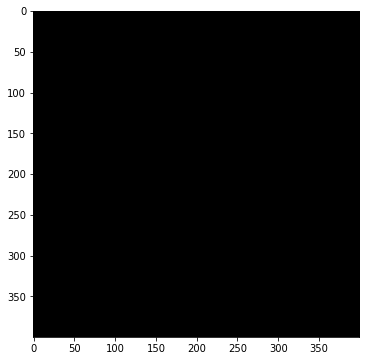

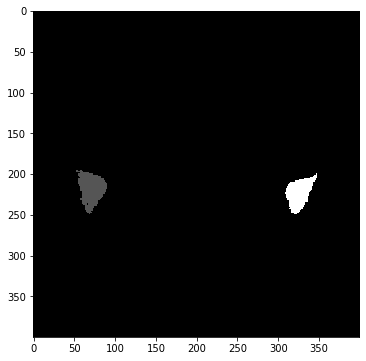

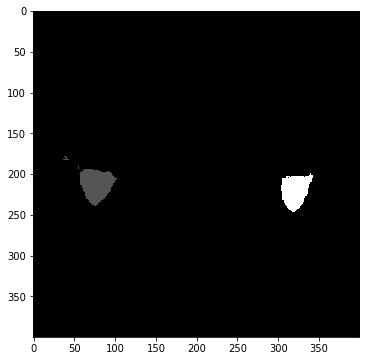

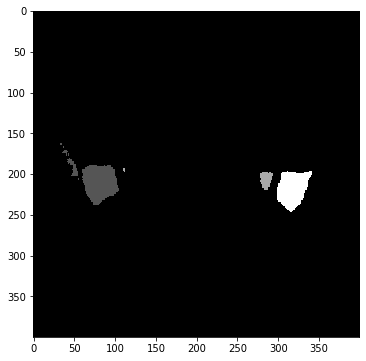

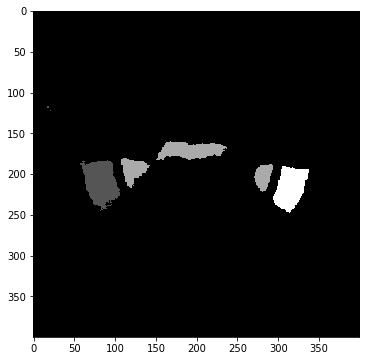

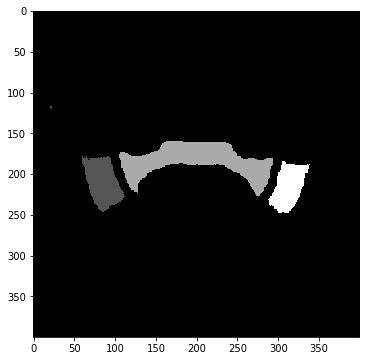

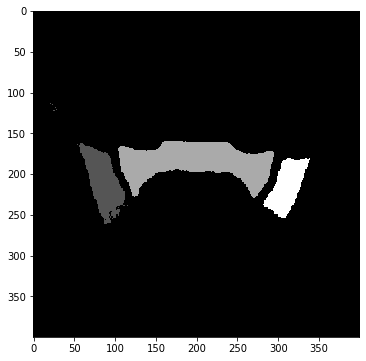

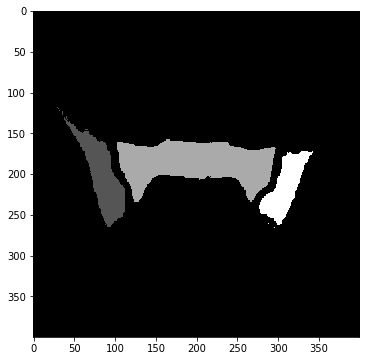

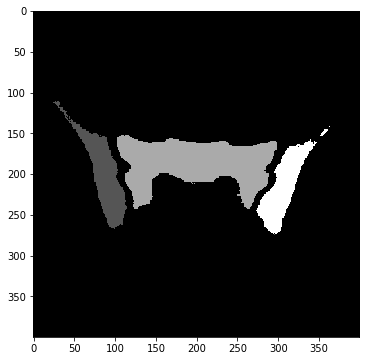

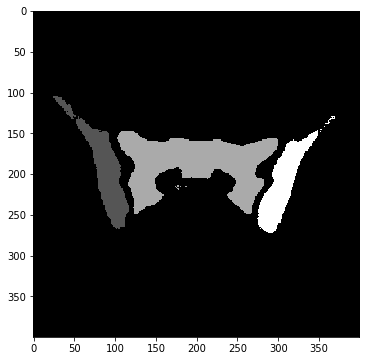

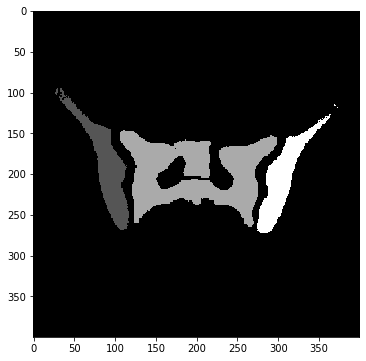

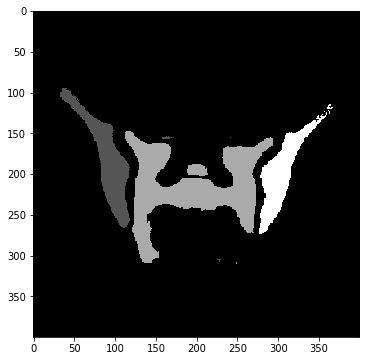

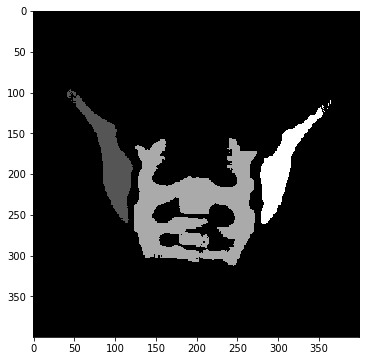

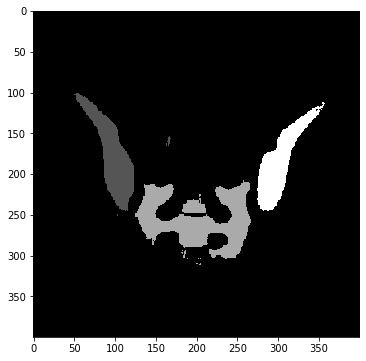

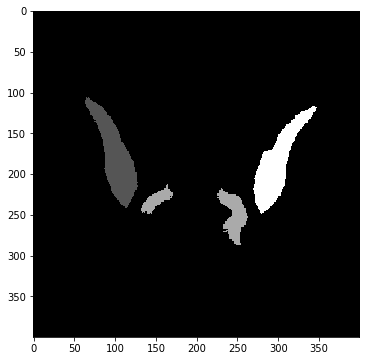

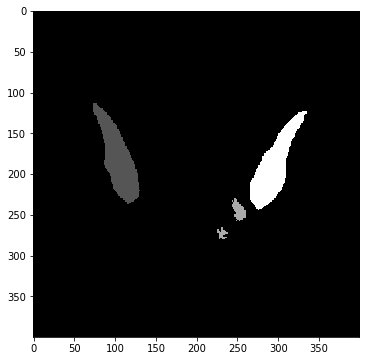

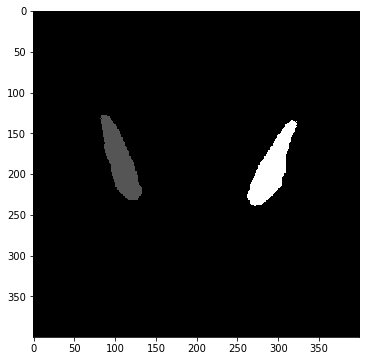

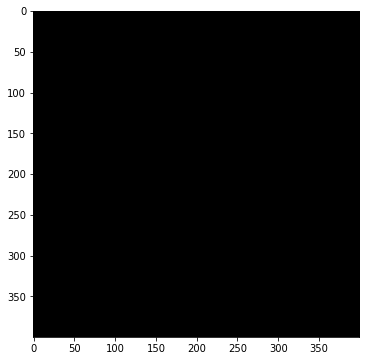

./Final_13_400_400_18_1_.raw
(400, 400, 18)


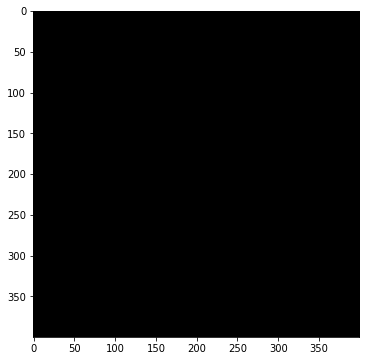

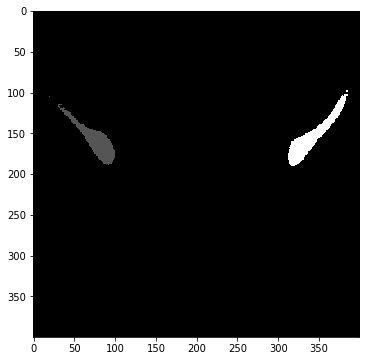

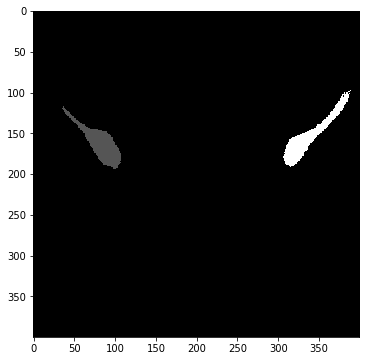

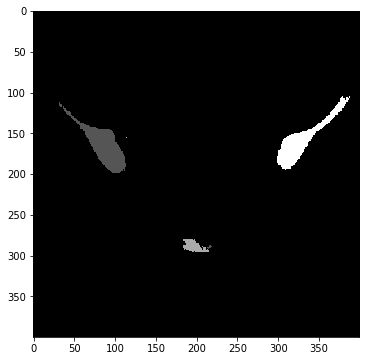

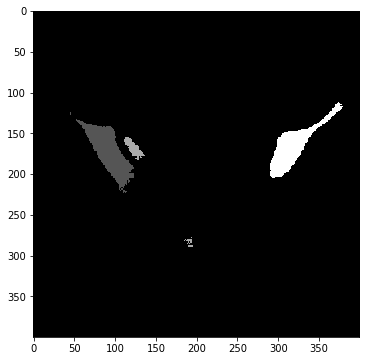

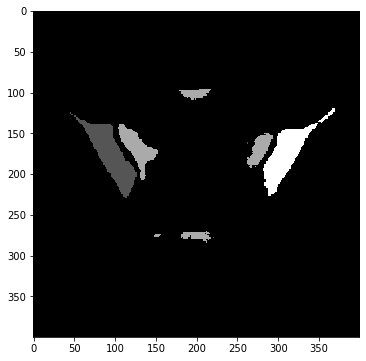

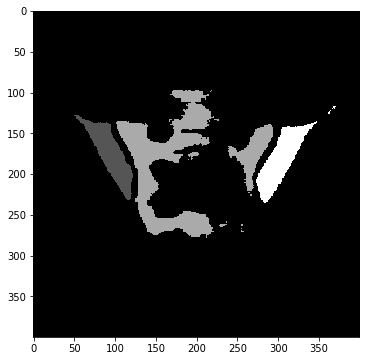

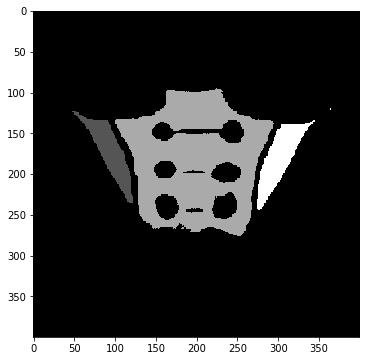

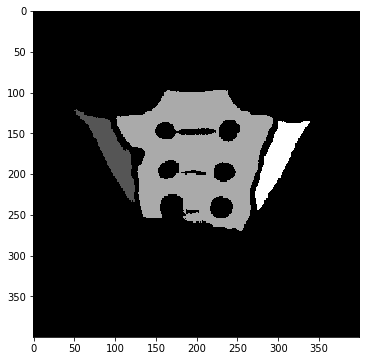

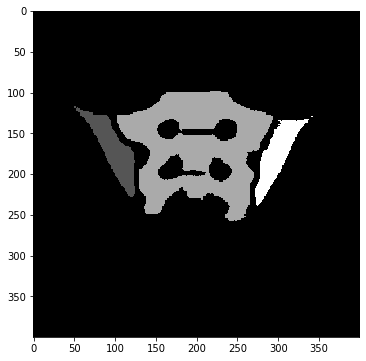

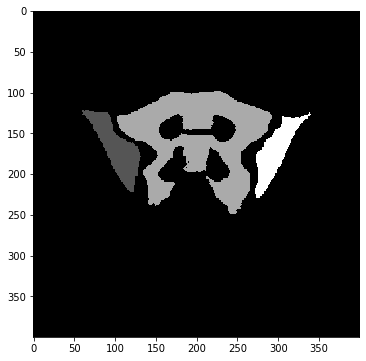

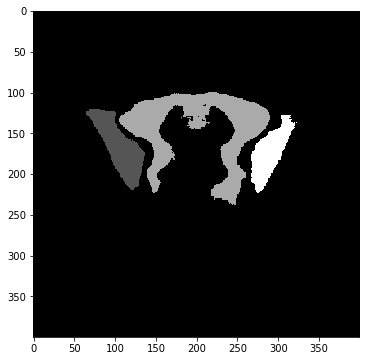

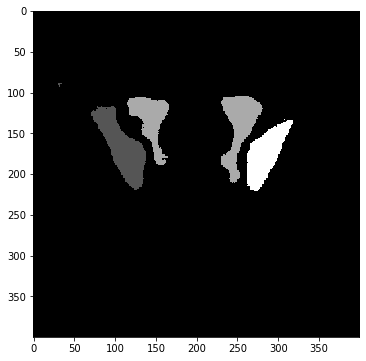

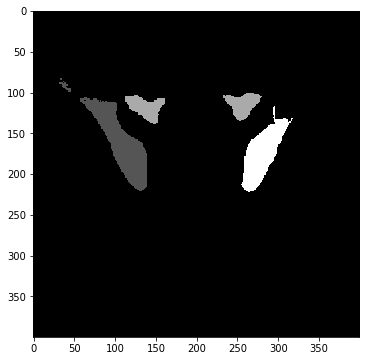

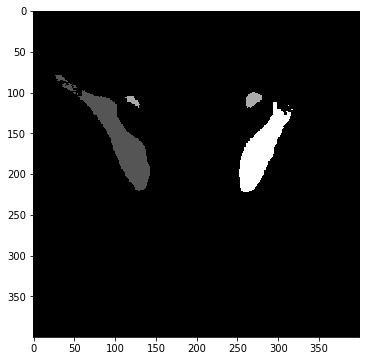

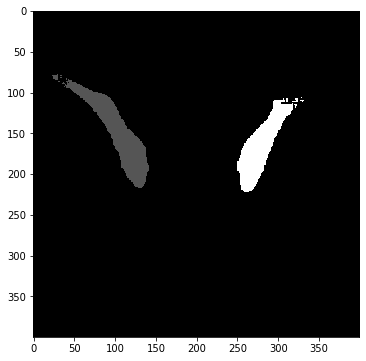

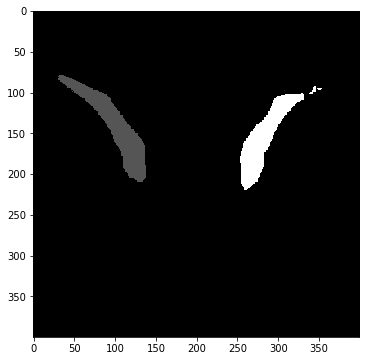

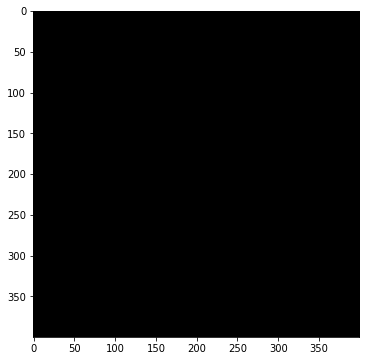

./Final_14_400_400_18_1_.raw
(400, 400, 18)


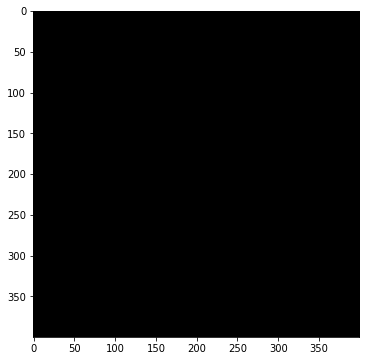

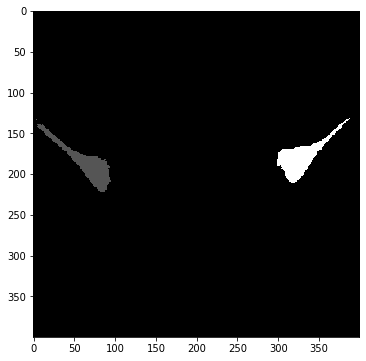

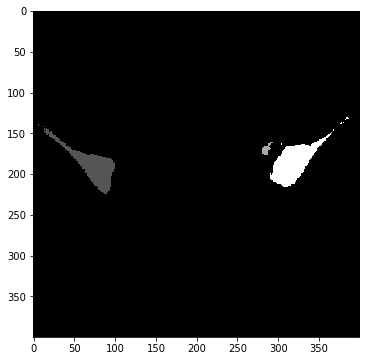

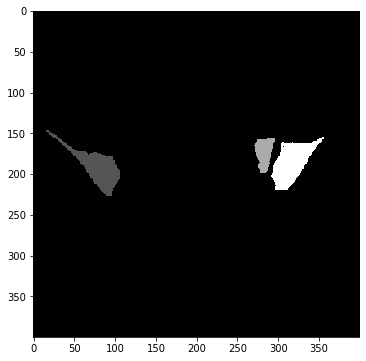

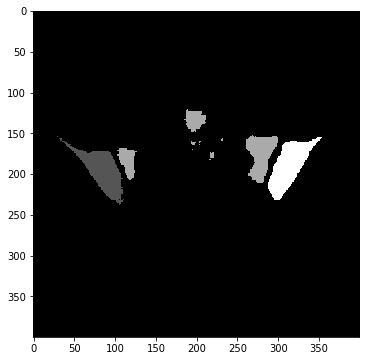

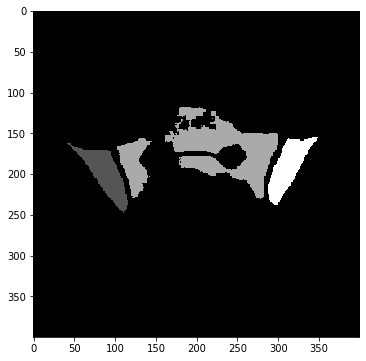

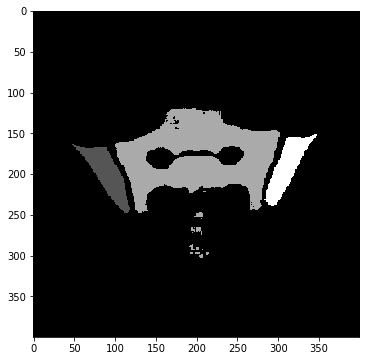

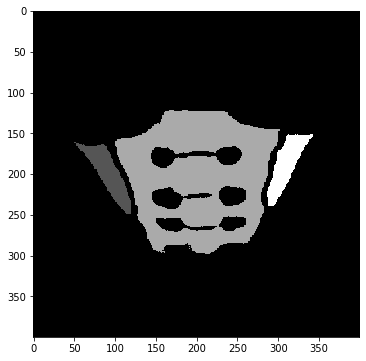

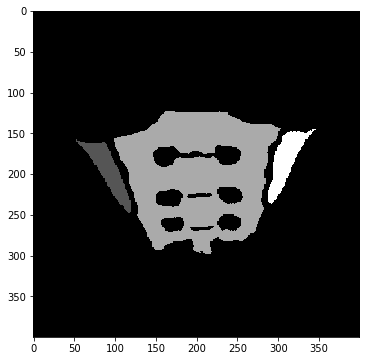

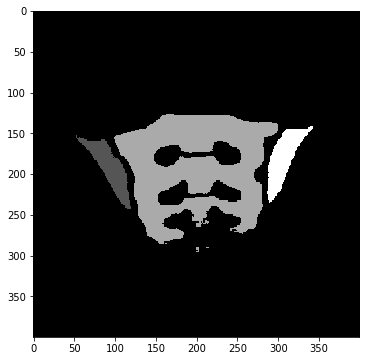

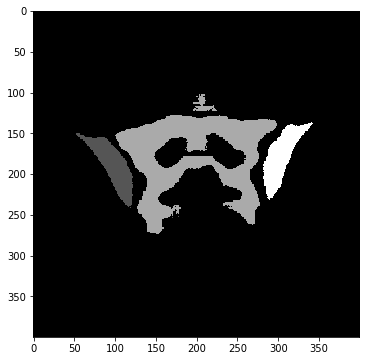

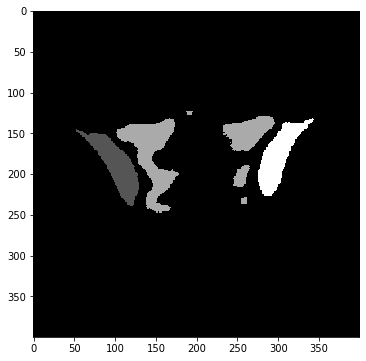

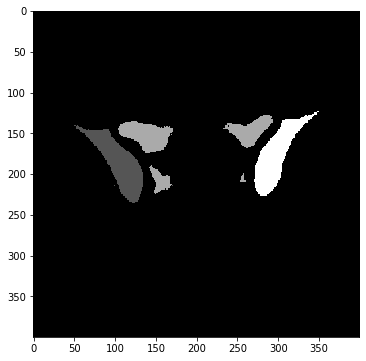

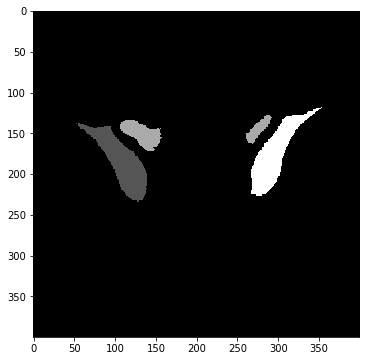

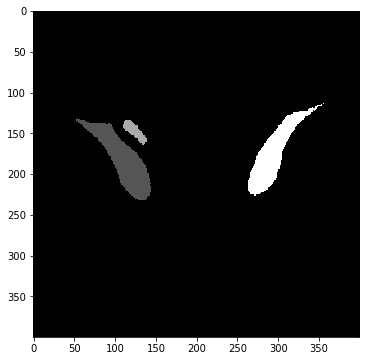

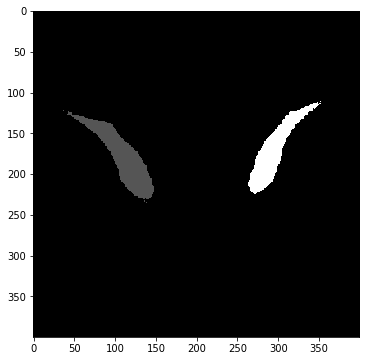

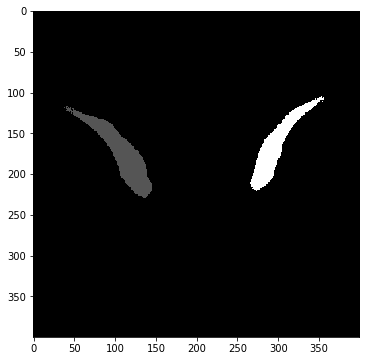

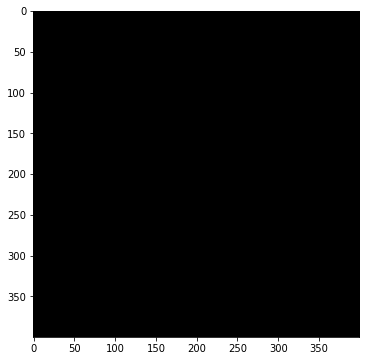

./Final_15_400_400_18_1_.raw
(400, 400, 18)


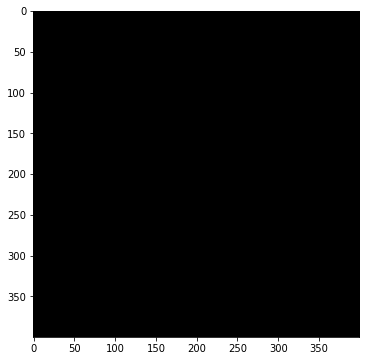

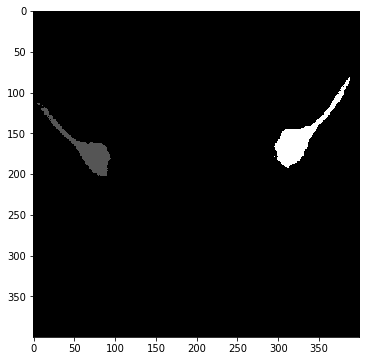

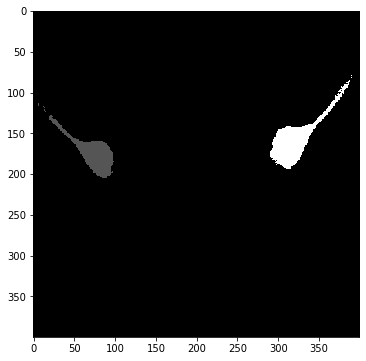

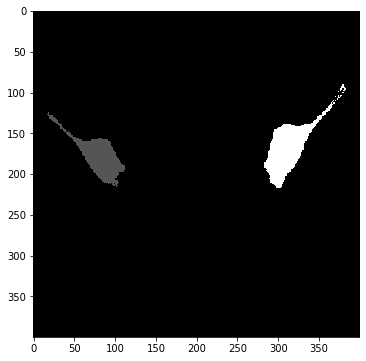

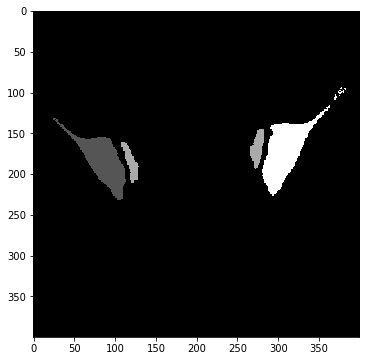

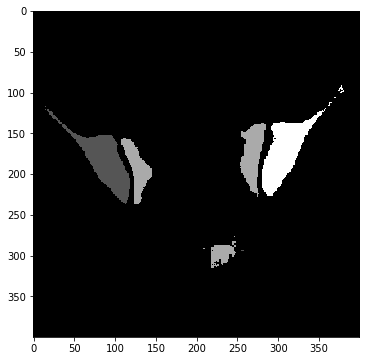

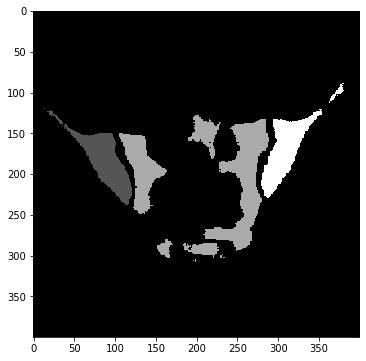

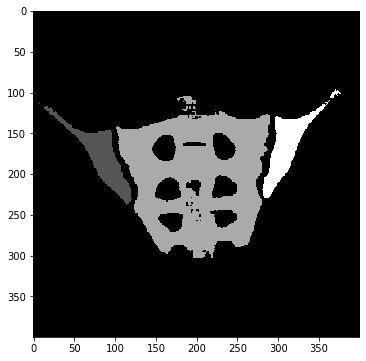

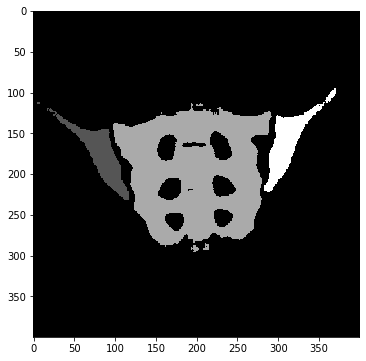

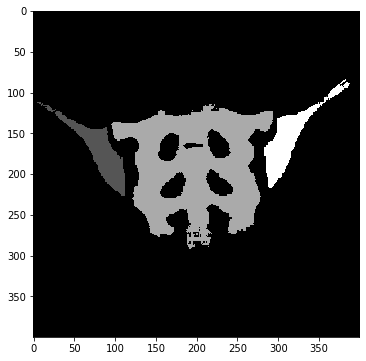

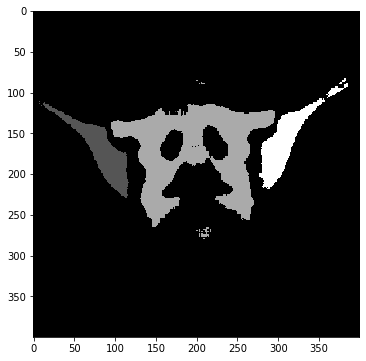

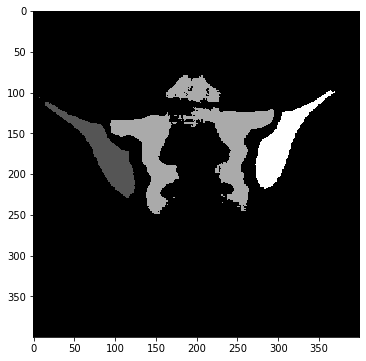

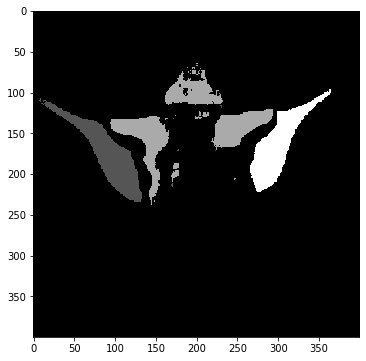

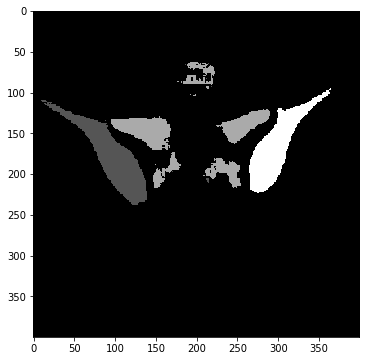

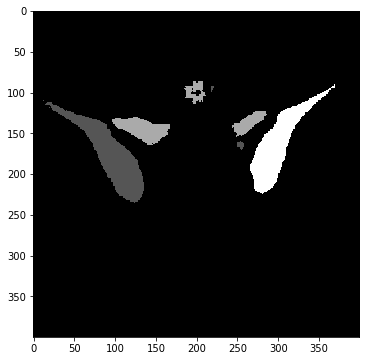

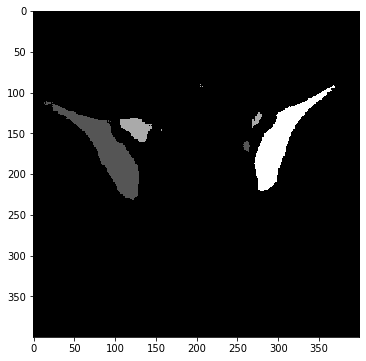

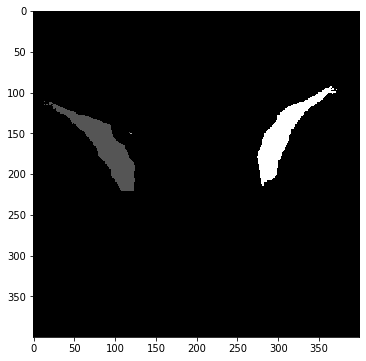

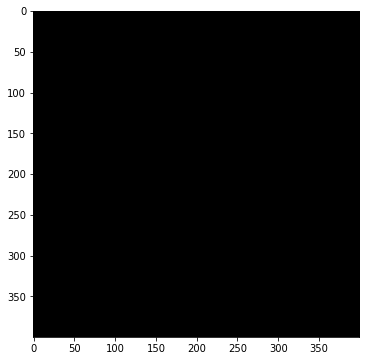

./Final_16_400_400_22_1_.raw
(400, 400, 22)


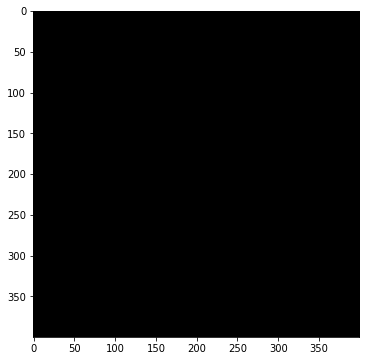

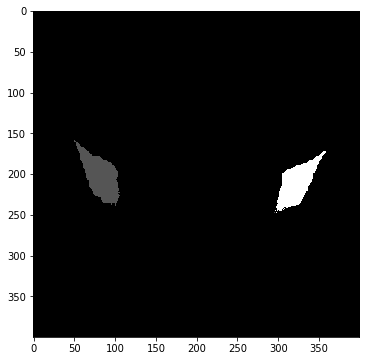

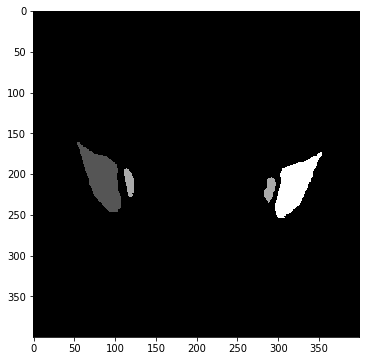

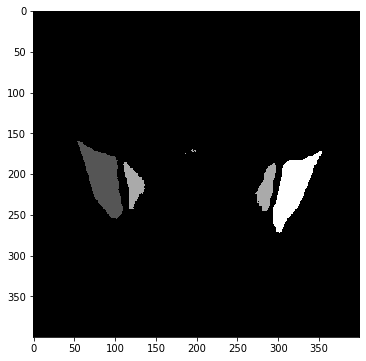

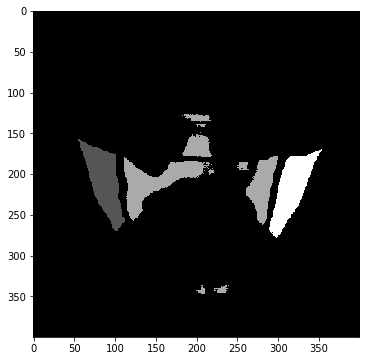

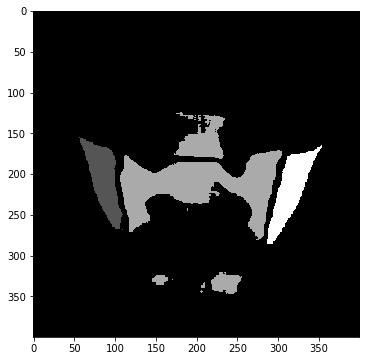

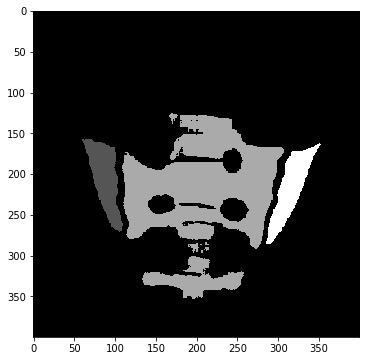

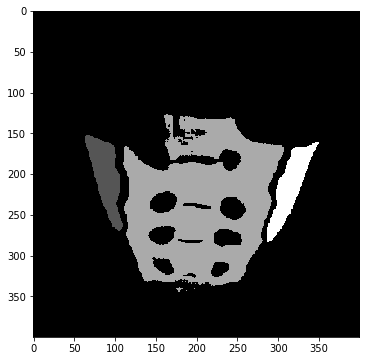

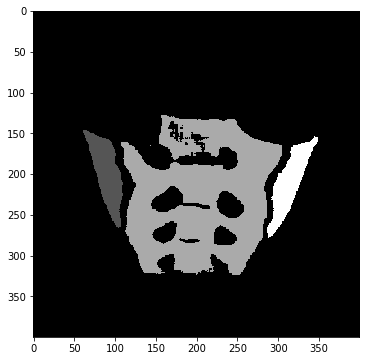

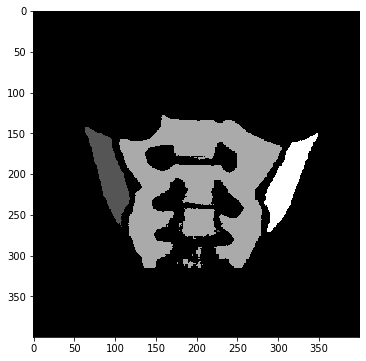

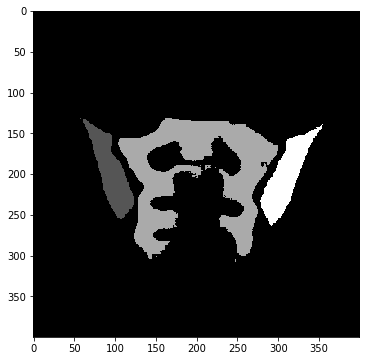

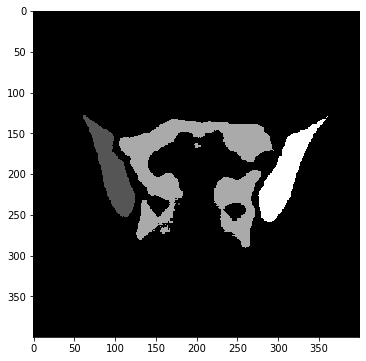

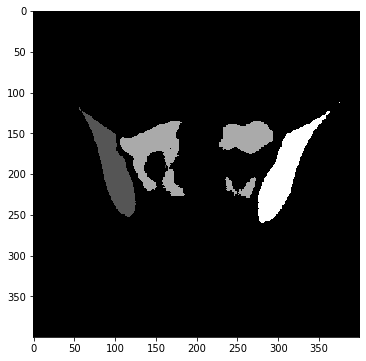

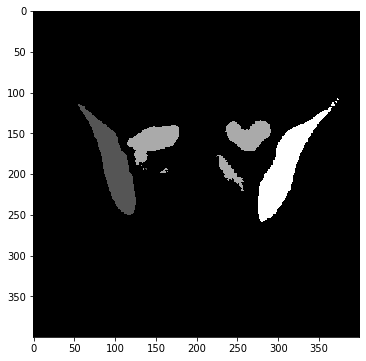

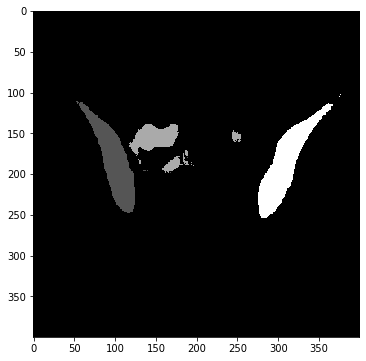

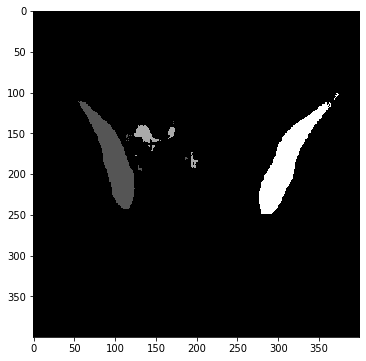

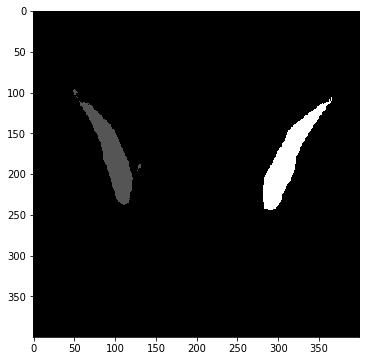

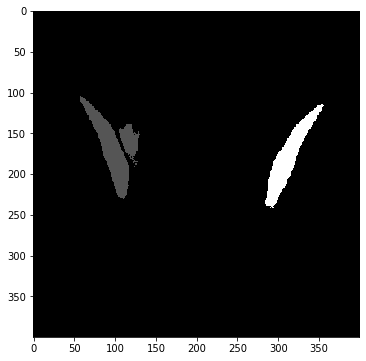

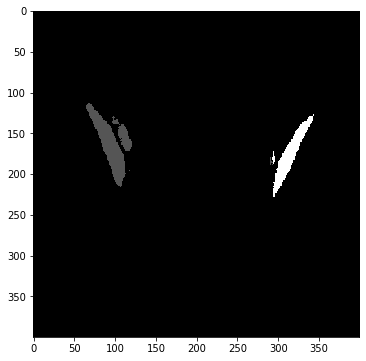

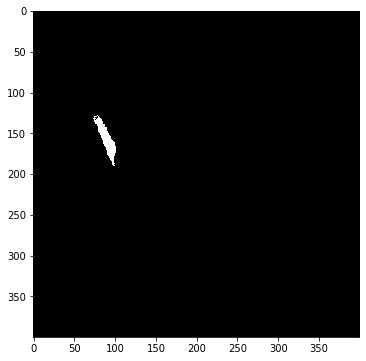

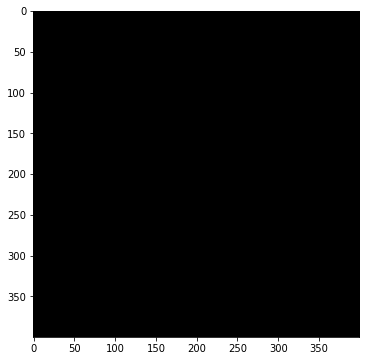

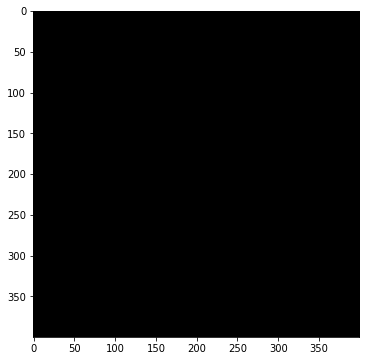

./Final_17_400_400_18_1_.raw
(400, 400, 18)


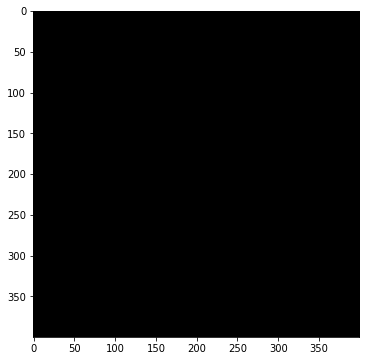

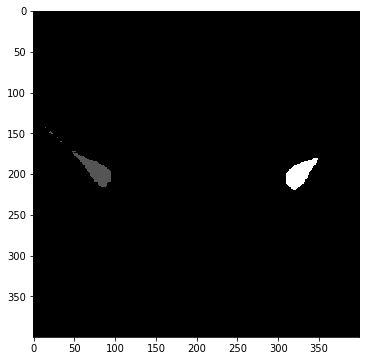

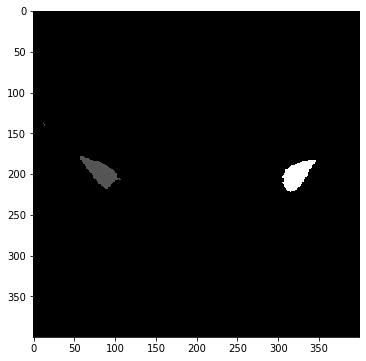

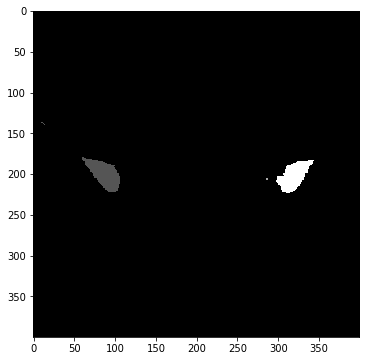

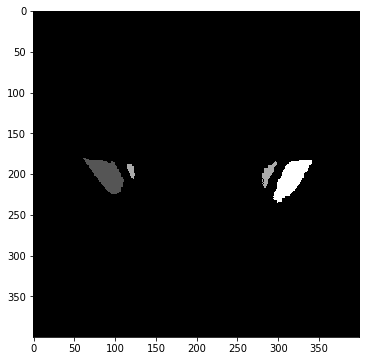

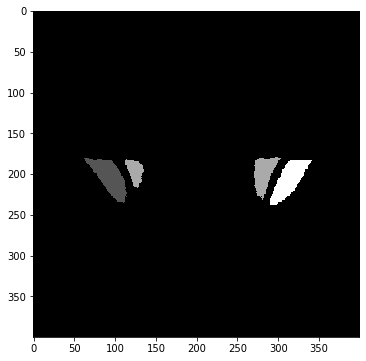

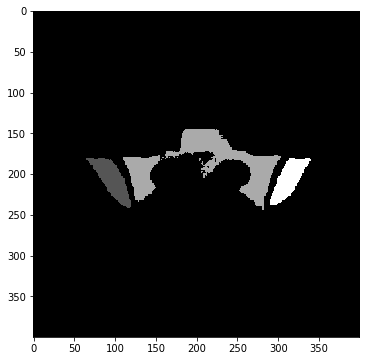

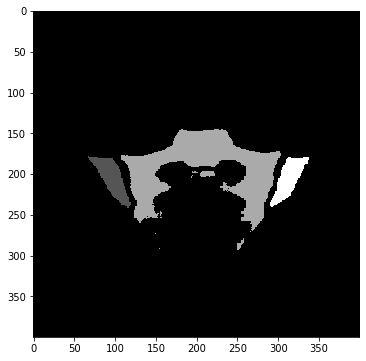

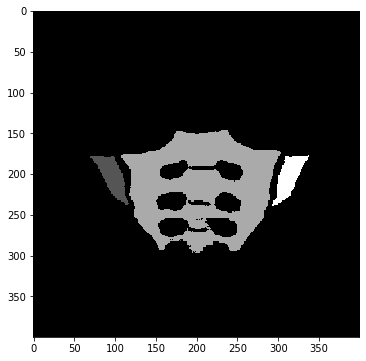

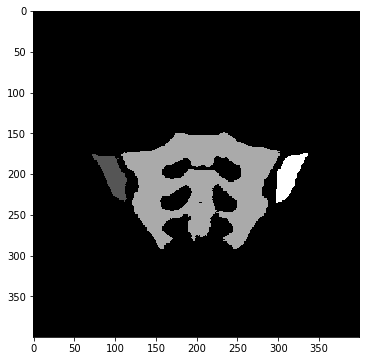

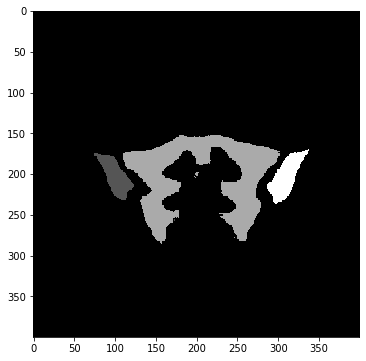

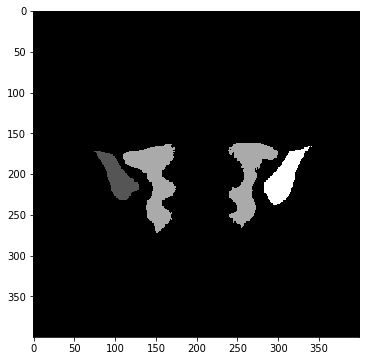

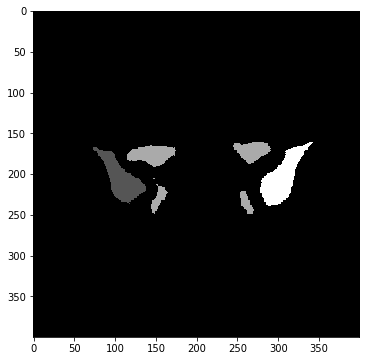

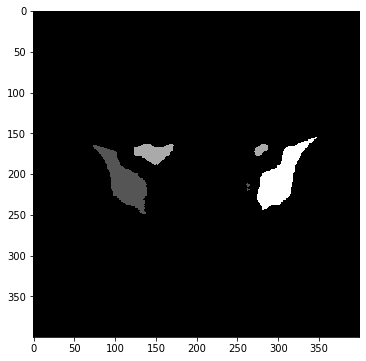

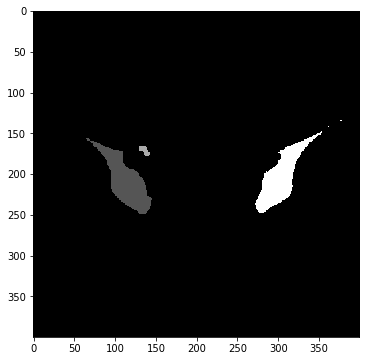

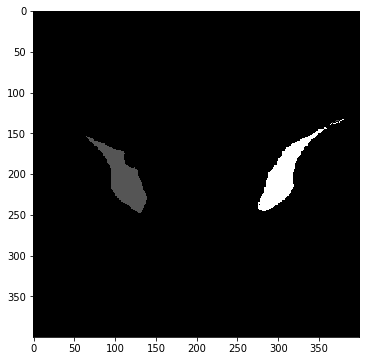

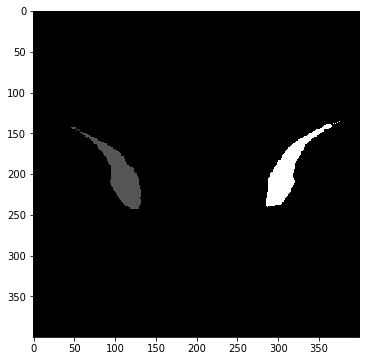

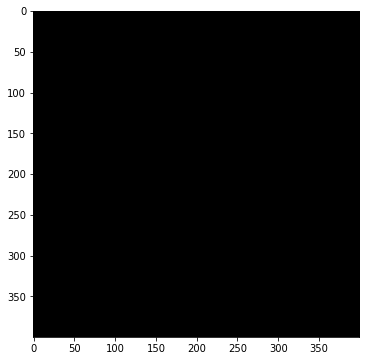

./Final_18_400_400_18_1_.raw
(400, 400, 18)


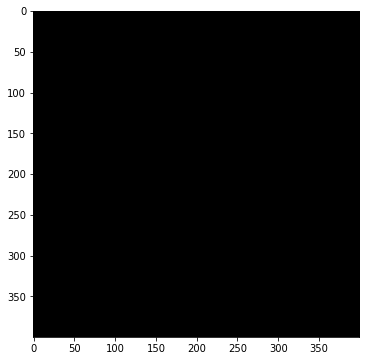

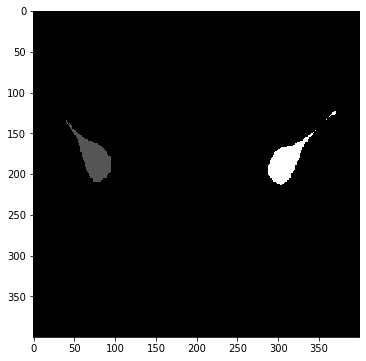

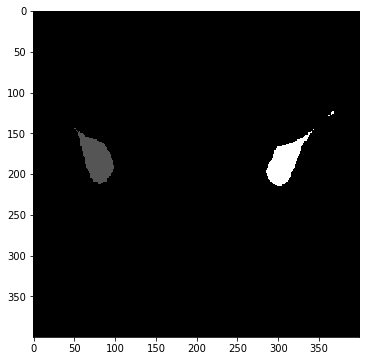

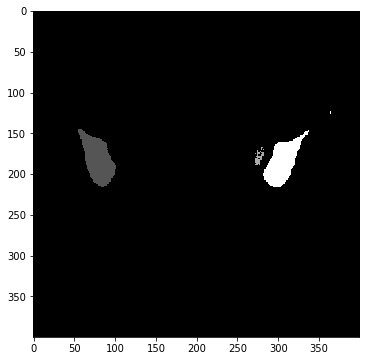

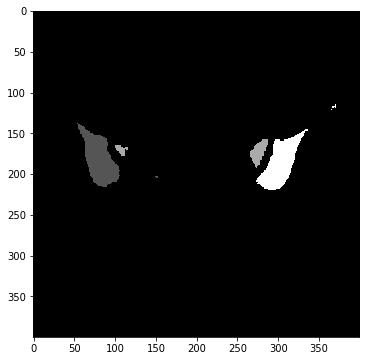

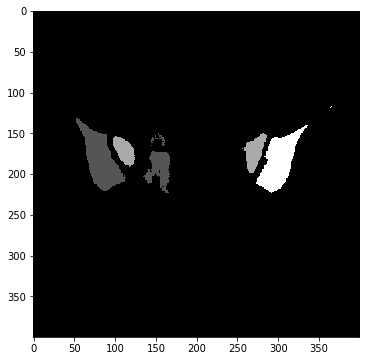

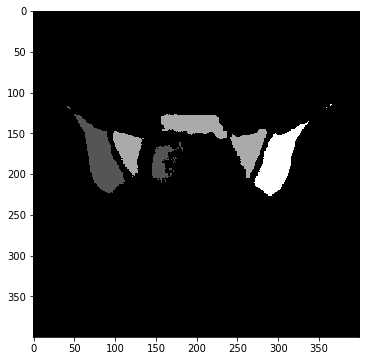

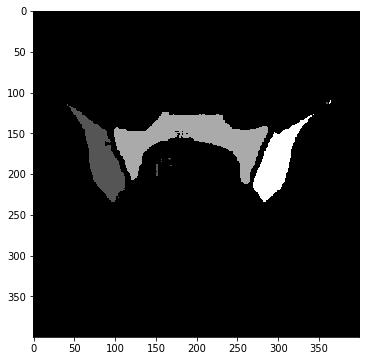

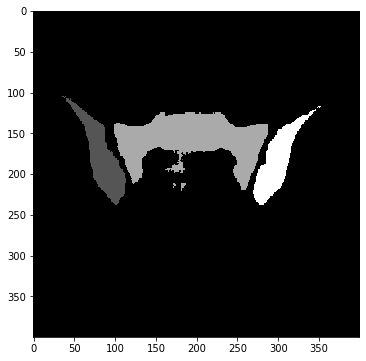

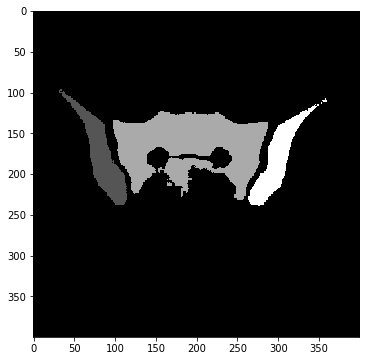

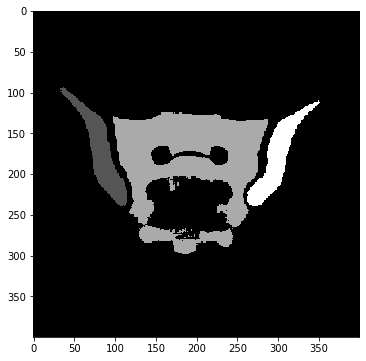

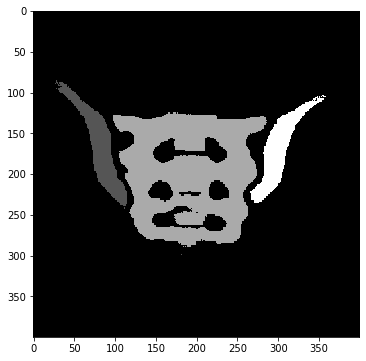

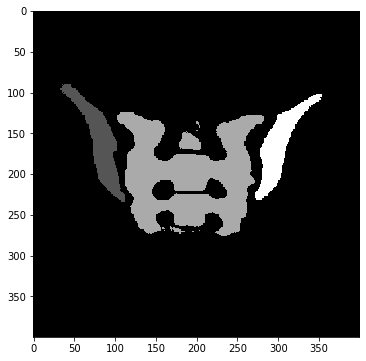

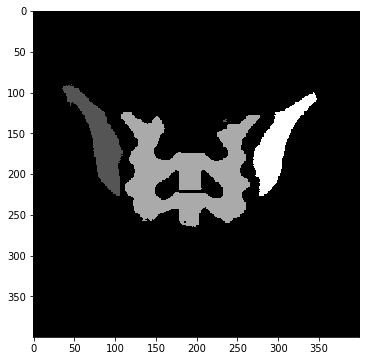

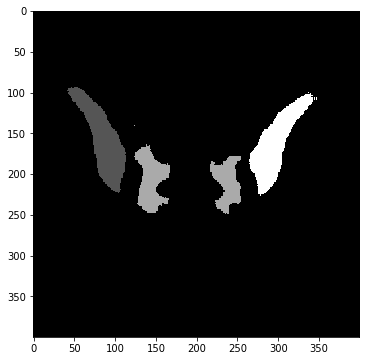

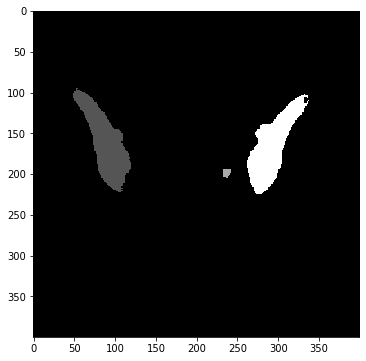

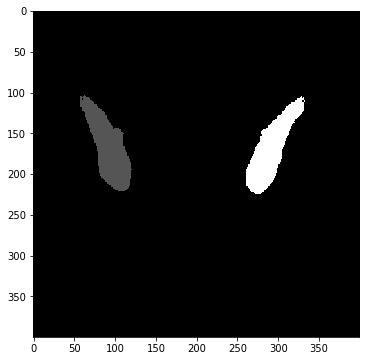

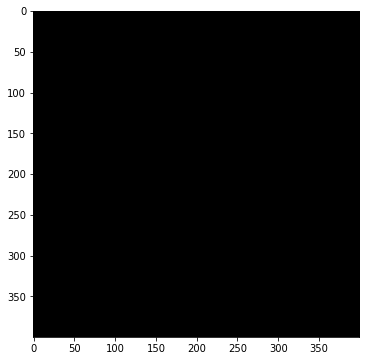

./Final_19_400_400_20_1_.raw
(400, 400, 20)


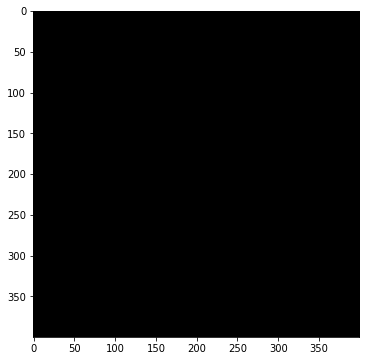

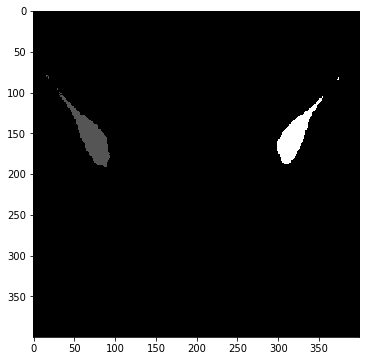

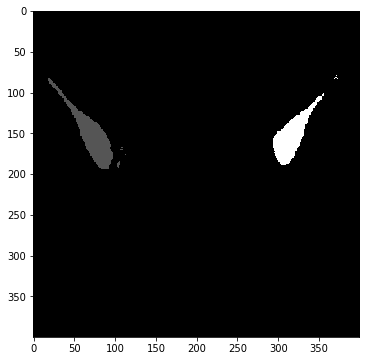

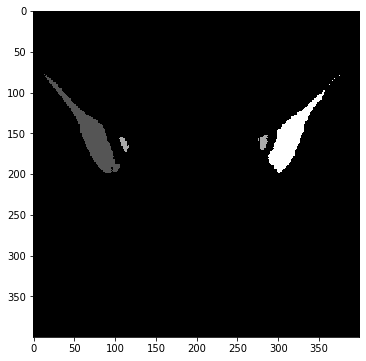

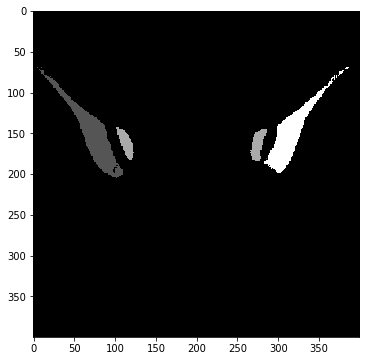

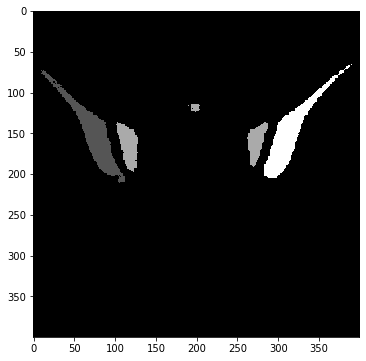

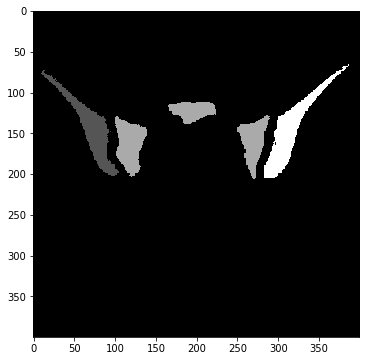

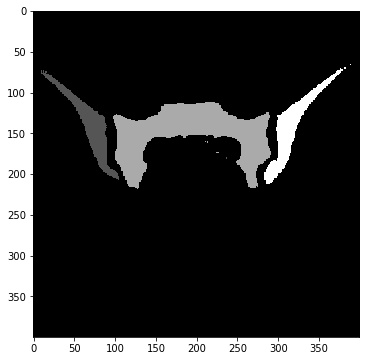

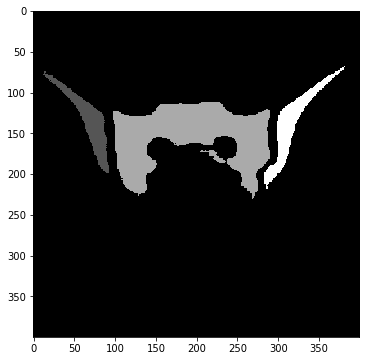

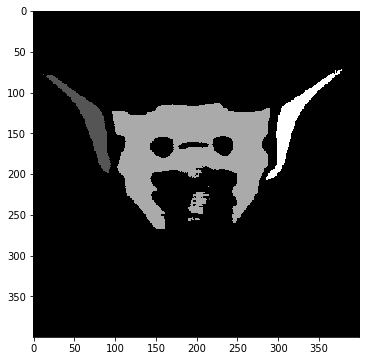

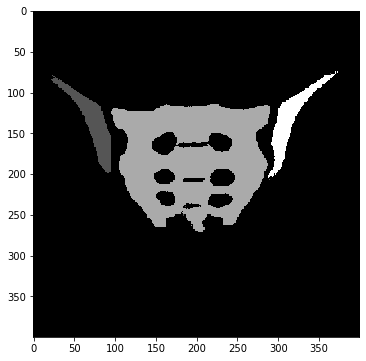

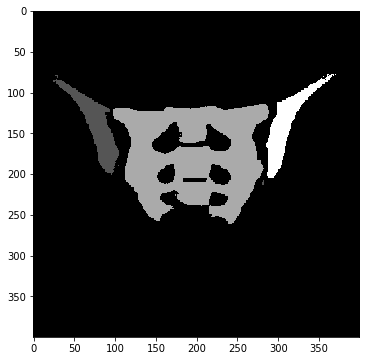

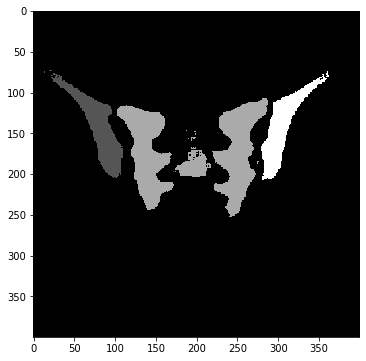

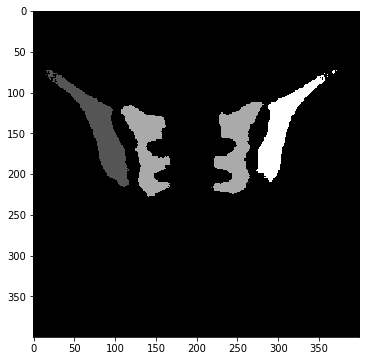

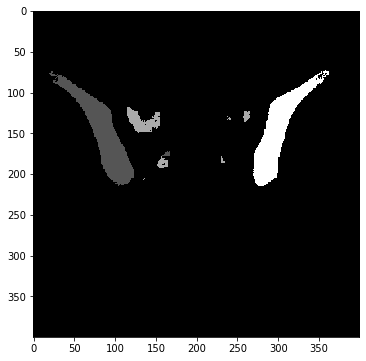

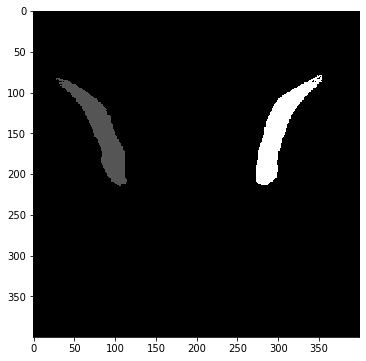

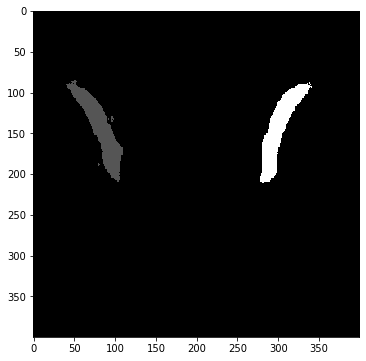

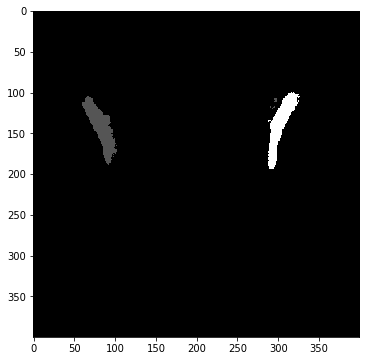

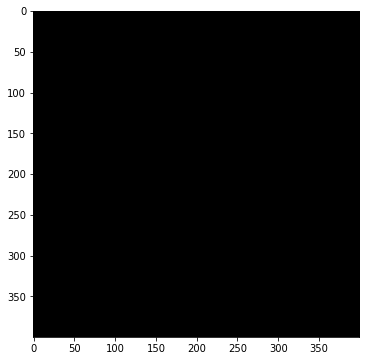

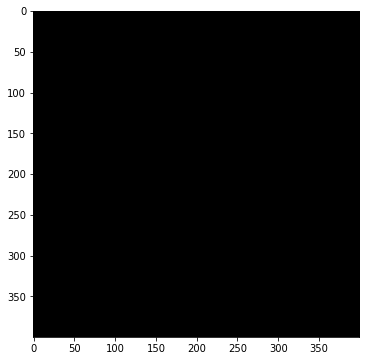

./Final_20_400_400_18_1_.raw
(400, 400, 18)


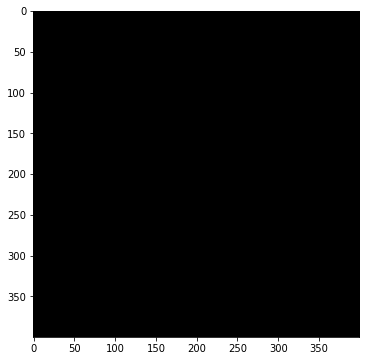

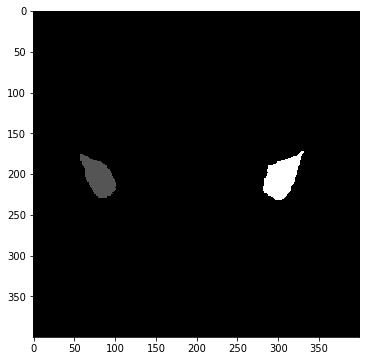

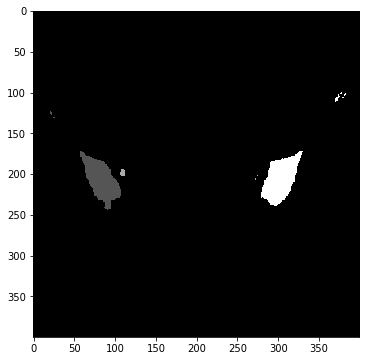

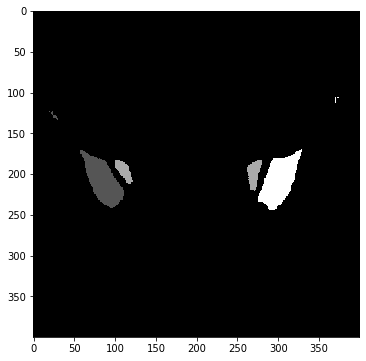

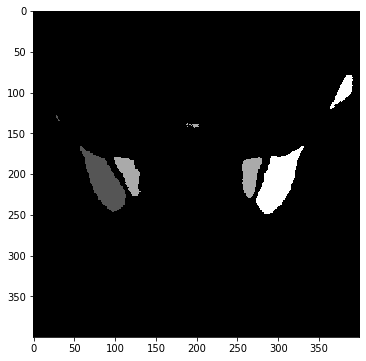

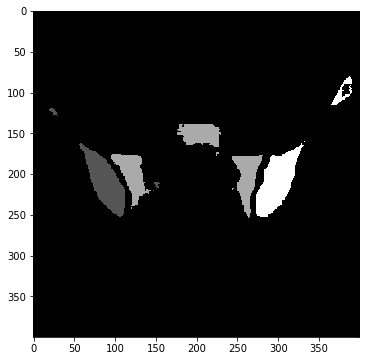

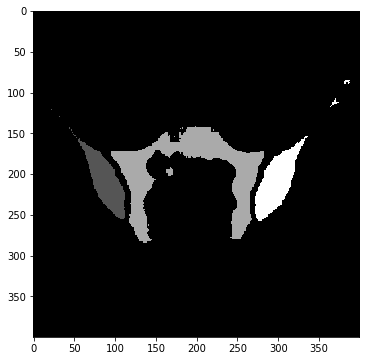

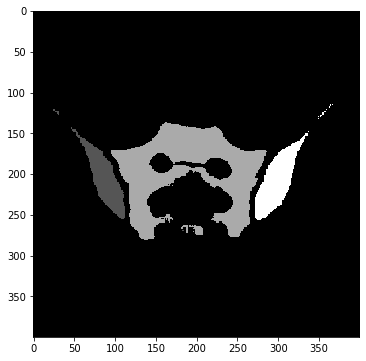

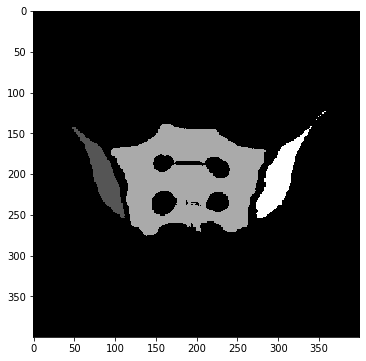

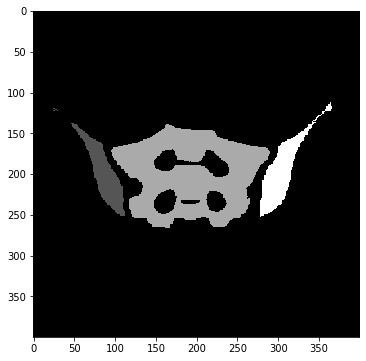

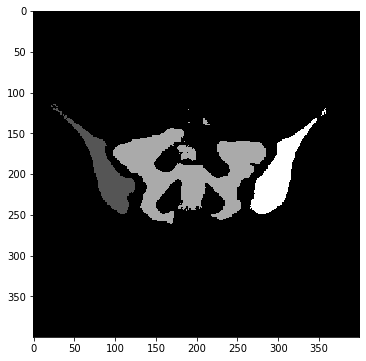

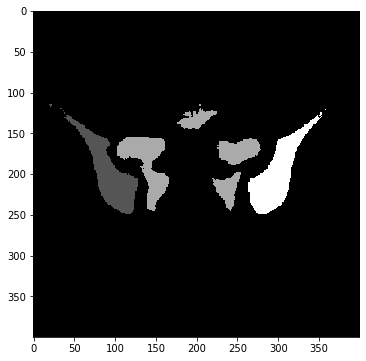

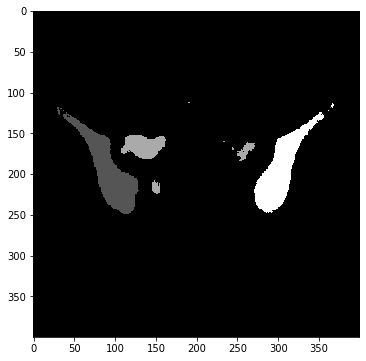

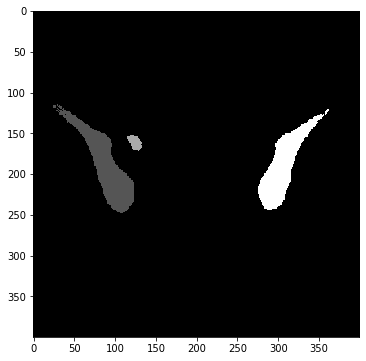

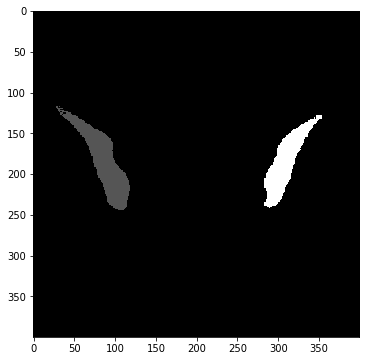

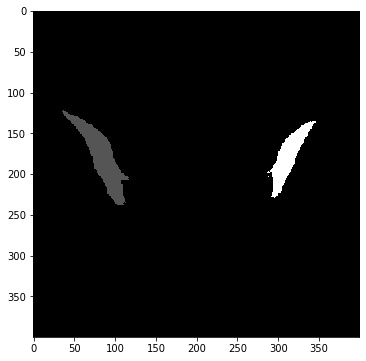

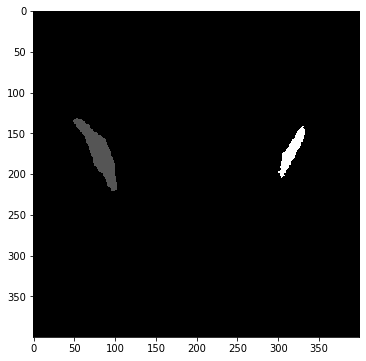

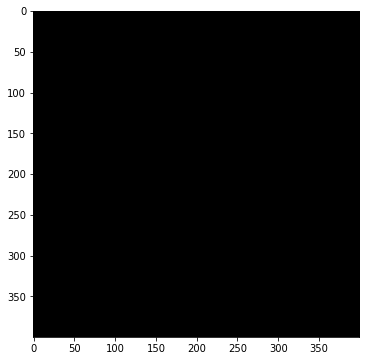

./Final_21_400_400_18_1_.raw
(400, 400, 18)


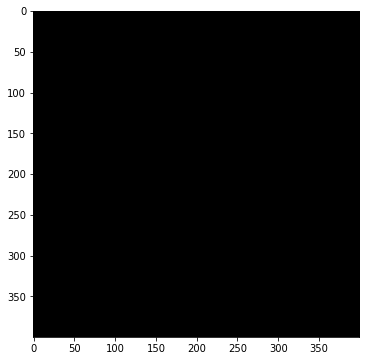

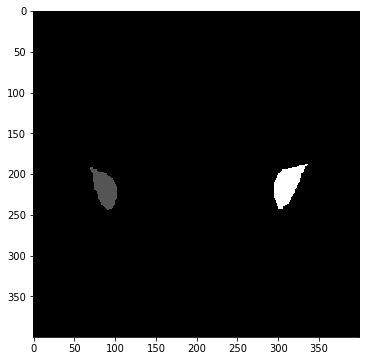

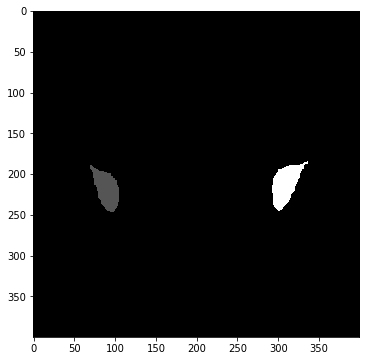

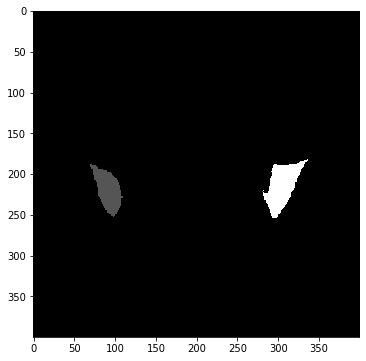

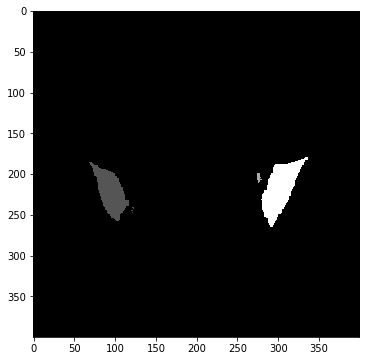

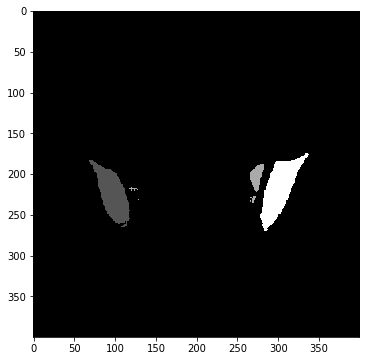

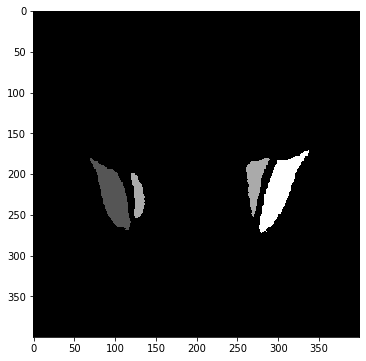

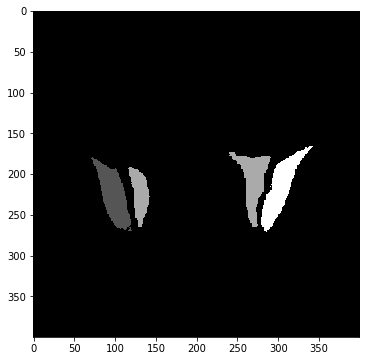

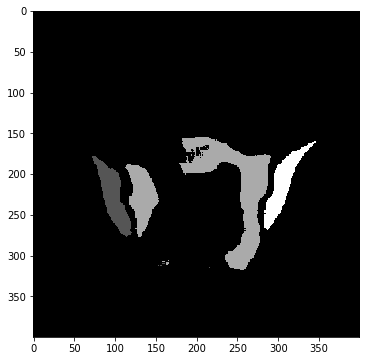

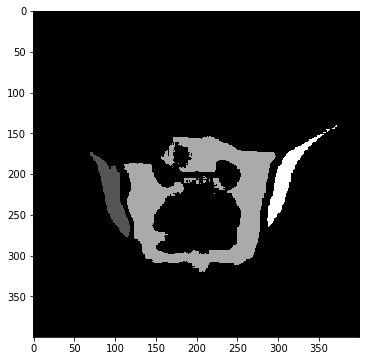

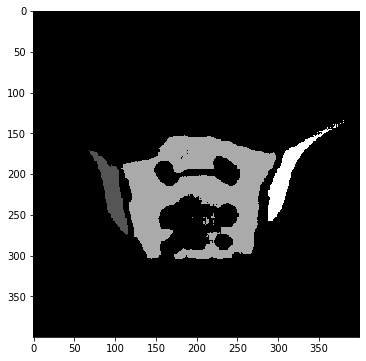

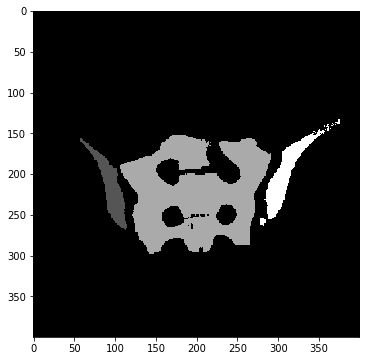

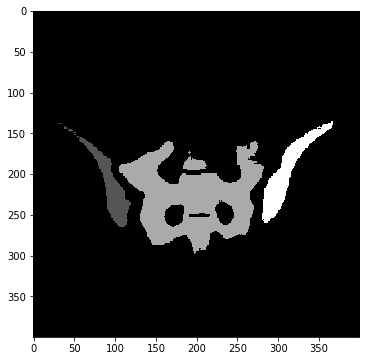

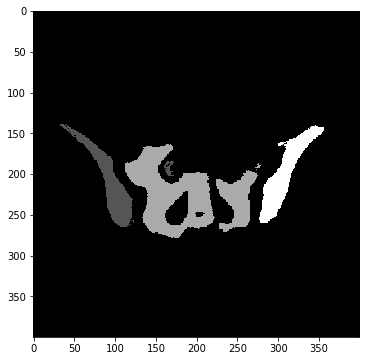

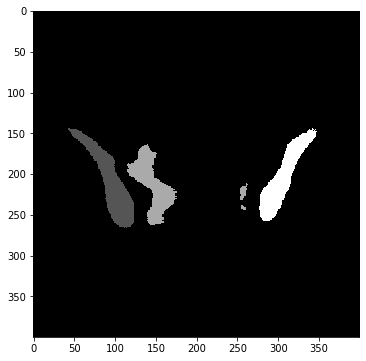

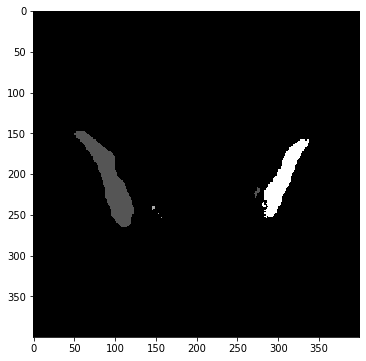

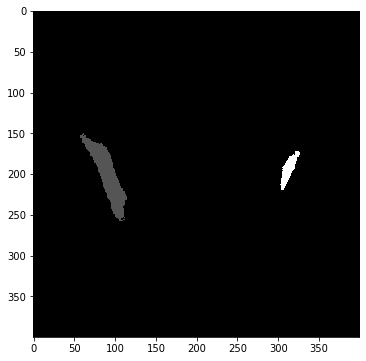

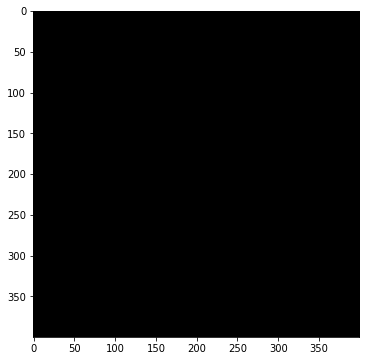

./Final_22_400_400_22_1_.raw
(400, 400, 22)


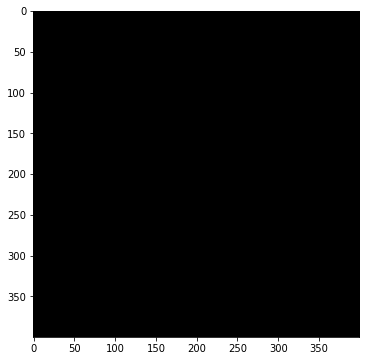

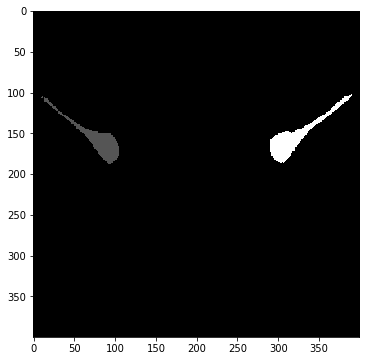

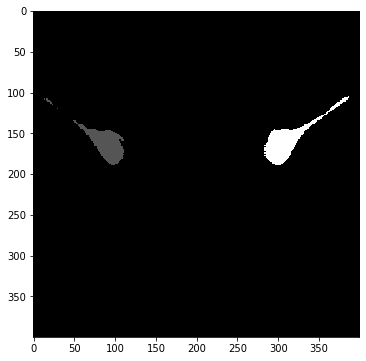

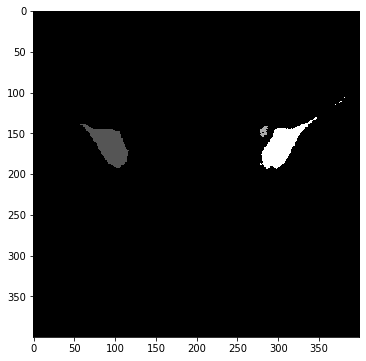

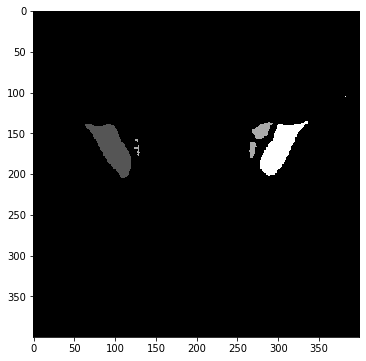

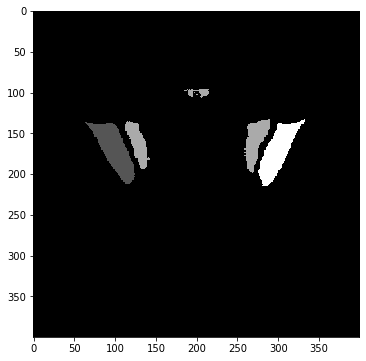

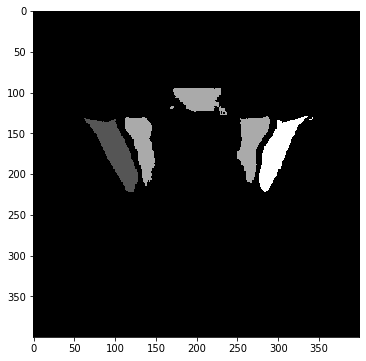

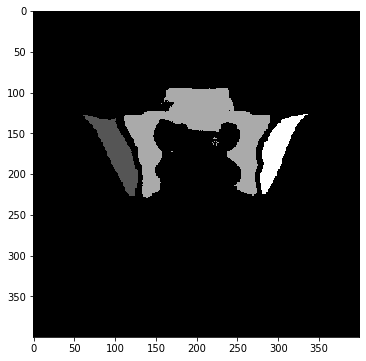

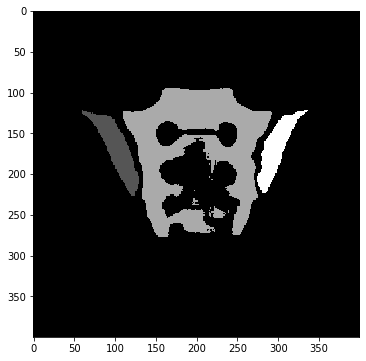

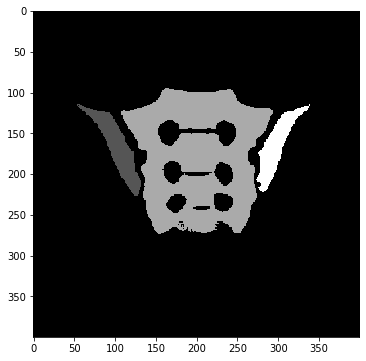

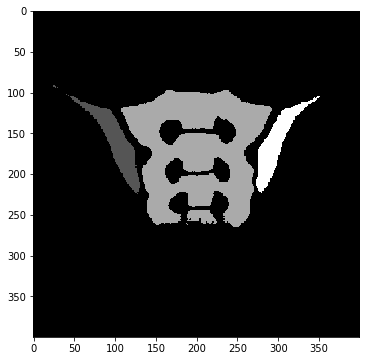

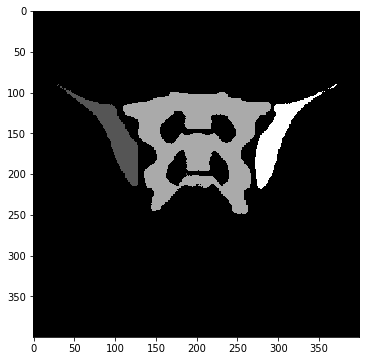

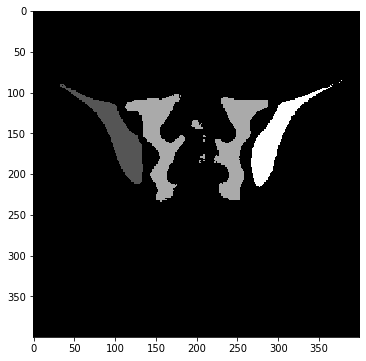

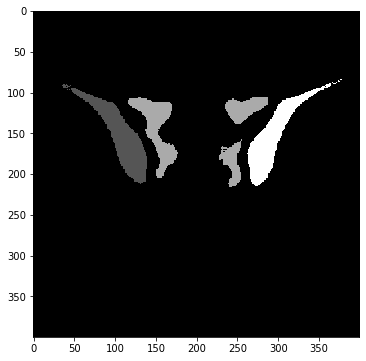

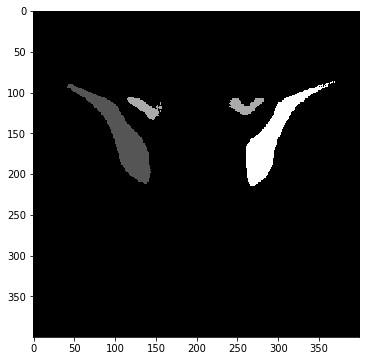

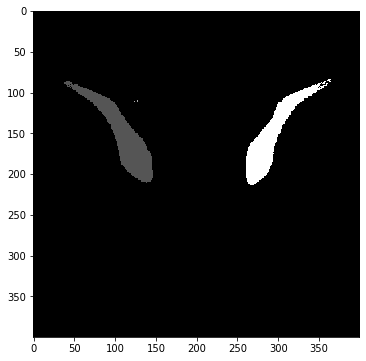

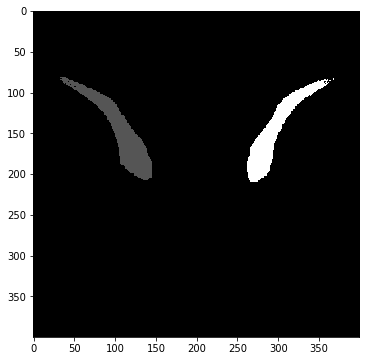

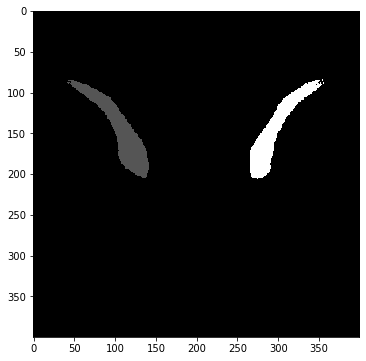

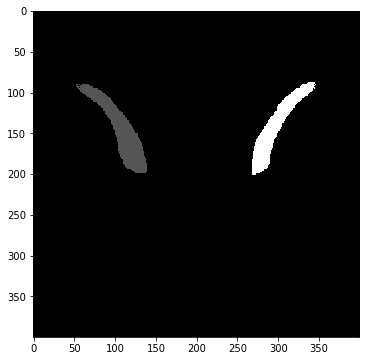

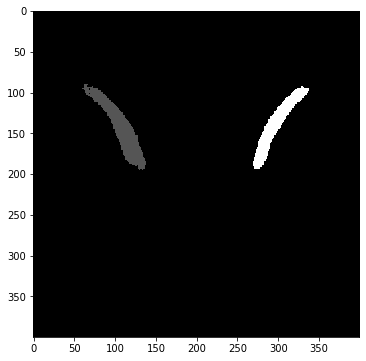

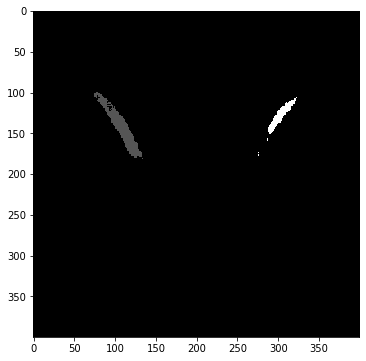

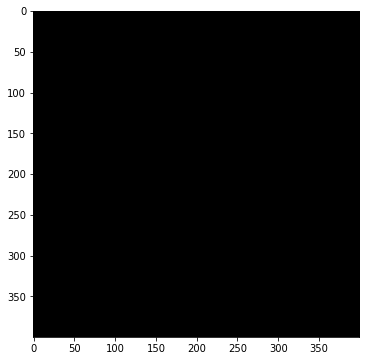

./Final_23_400_400_20_1_.raw
(400, 400, 20)


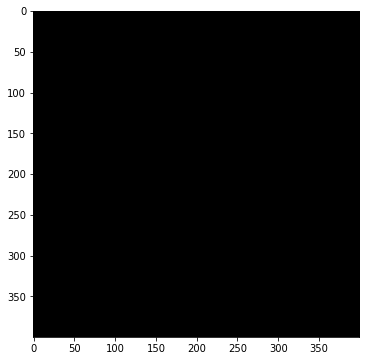

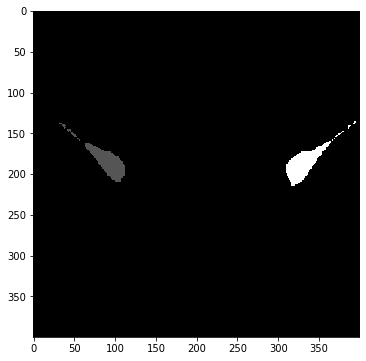

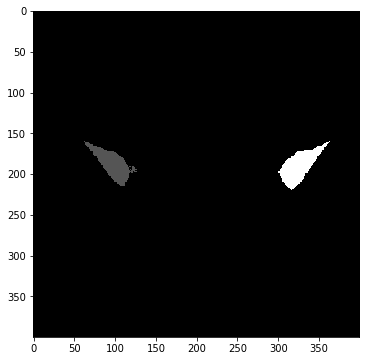

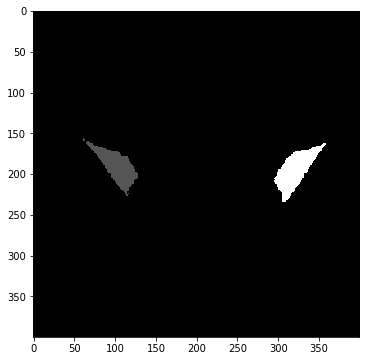

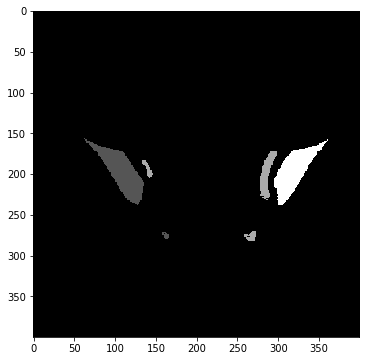

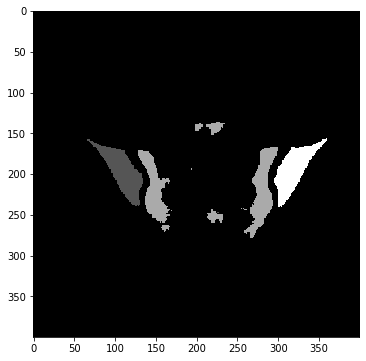

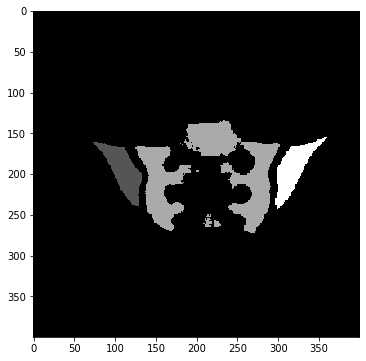

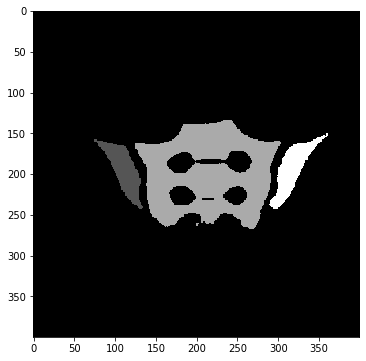

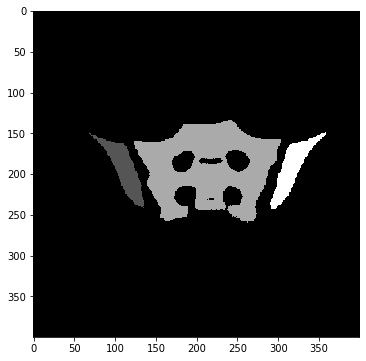

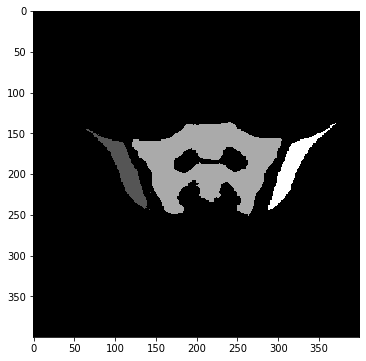

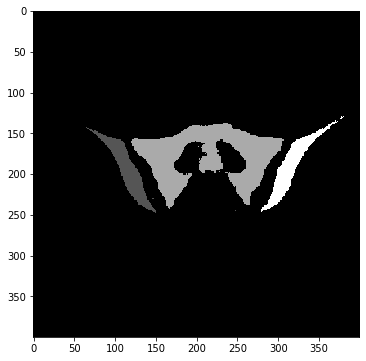

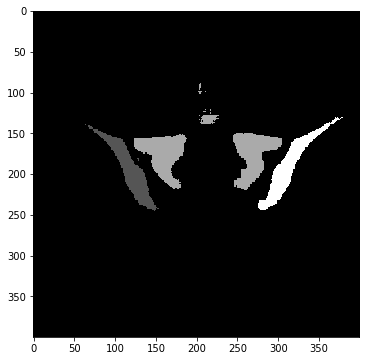

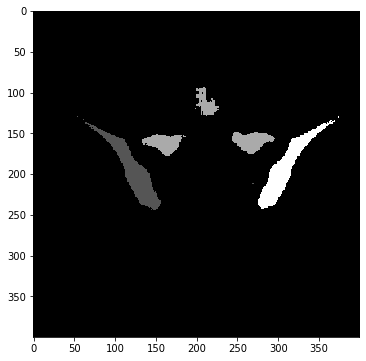

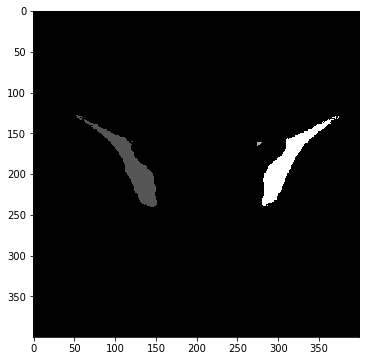

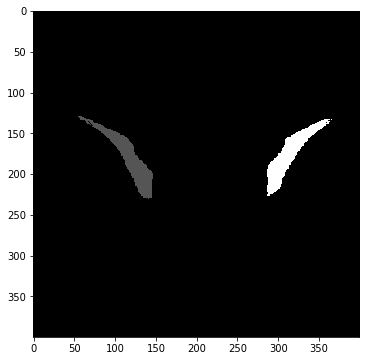

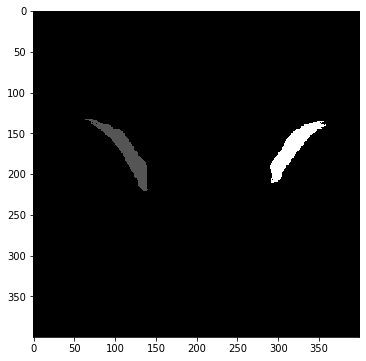

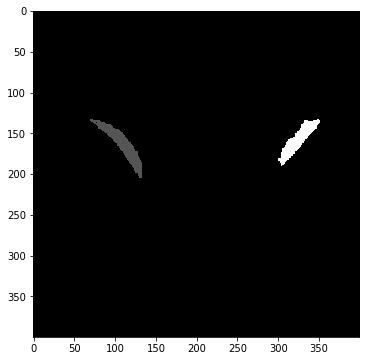

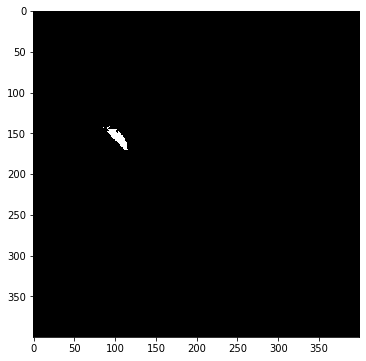

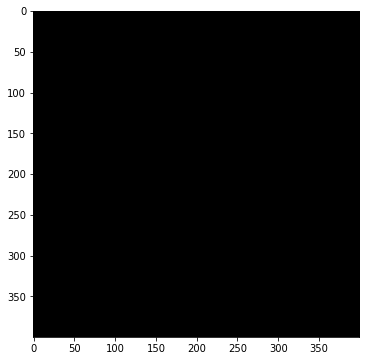

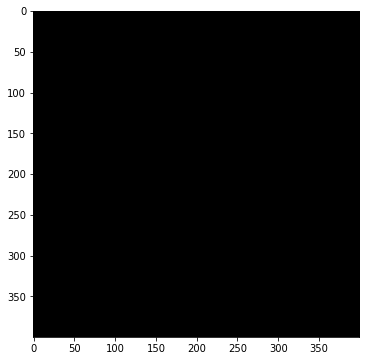

In [3]:
#TEST STEP 4

PRED_DIR = './'

#lab_dir_list = glob.glob(PRED_DIR+'Corr1BoneLabels_*.raw')
lab_dir_list = glob.glob(PRED_DIR+'Final*.raw')
lab_dir_list.sort()


for l in lab_dir_list:
    print(l)

    name_l = l.split('/')[-1].split('.')[0]
    _ , num_l,SIZE_l,_,H_l,B_l,_ = name_l.split('_')

    lab = readBinaryData(l,int(SIZE_l),int(H_l),int(B_l))
    print(lab.shape)
    for s in range(0,int(H_l)):
        showOpencvImage(lab[:,:,s])
    
#    break
